In [2]:
import os
import matplotlib.pyplot as plt
import potion.visualization.notebook_utils as nu

# CARTPOLE (non-safe)

seeds = [2030, 4473, 5759, 5756, 4146, 1428, 9723, 3212, 8589, 1971]

In [3]:
os.chdir('/home/matteo/policy-optimization/results/cartpole_unsafe')

* sigmainit = 0.5

LOWGPOMDPf: 513.957082 +- 2.389004
LOWNAIVEf: 118.767167 +- 0.486611
LOWMEPGf: 784.694725 +- 15.678193


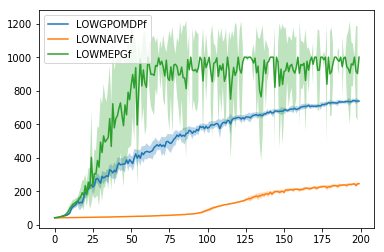

LOWGPOMDPf: 0.500000 +- 0.000000
LOWNAIVEf: 0.432797 +- 0.009976
LOWMEPGf: 1.971546 +- 0.059446


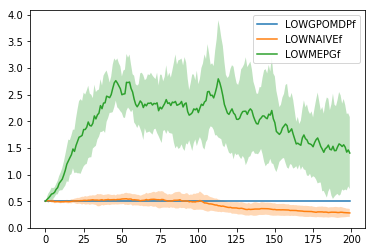

In [4]:
nu.compare('contcartpole', 
           ['LOWGPOMDPf', 'LOWNAIVEf', 'LOWMEPGf'], 
           keys=['UPerf', 'Exploration'], 
           separate=False,
           conf=.99)

* sigmainit = 5.0

HIGHGPOMDPf: 469.803943 +- 20.427018
HIGHNAIVEf: 98.086065 +- 0.405403
HIGHMEPGf: 825.397792 +- 6.147653


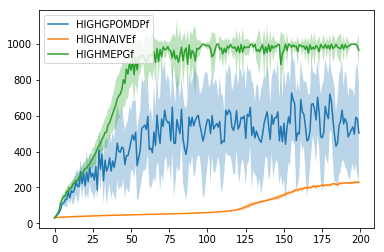

HIGHGPOMDPf: 5.000000 +- 0.000000
HIGHNAIVEf: 1.196718 +- 0.015471
HIGHMEPGf: 3.130970 +- 0.013477


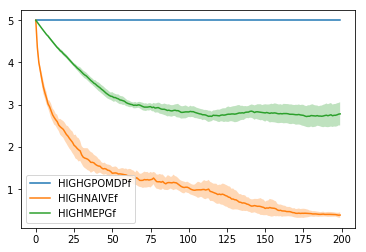

In [5]:
nu.compare('contcartpole', 
           ['HIGHGPOMDPf', 'HIGHNAIVEf', 'HIGHMEPGf'], 
           keys=['UPerf', 'Exploration'], 
           separate=False,
           conf=.99)